In [97]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.pipeline import Pipeline
from sklearn.metrics import recall_score, accuracy_score, f1_score, confusion_matrix
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
import numpy as np
import joblib
import seaborn as sns

In [85]:
#! pip install --user imblearn
# Use to download packages

In [86]:
import os
for dirname, _, filenames in os.walk('dataset/'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

dataset/SQLiV3.csv


In [87]:
df = pd.read_csv('dataset/SQLiV3.csv', encoding='utf-8') # Read the dataset.
del df['Unnamed: 2']
del df['Unnamed: 3']
df = df.dropna() # Remove Nan values.
df = df.drop(df[(df['Label'] != '0') & (df['Label'] != '1')].index) # Dropping the label values, that are different from 0 or 1.
df = df.reset_index()
df['Label'] = df['Label'].astype('int')
df.head(10)

,index,Sentence,Label
0,0,"true, $where: '1 == 1'",1
1,1,$where: '1 == 1',1
2,2,", $where: '1 == 1'",1
3,3,{ $ne: 1 },1
4,4,", $or: [ {}, { 'a':'a",1
5,5,;sleep(5000);,1
6,6,;return 'a'=='a' && ''==',1
7,7,""";return(true);var xyz='a",1
8,8,0;return true,1
9,9,|| 1==1,1


In [88]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30631 entries, 0 to 30630
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   index     30631 non-null  int64 
 1   Sentence  30631 non-null  object
 2   Label     30631 non-null  int32 
dtypes: int32(1), int64(1), object(1)
memory usage: 598.4+ KB


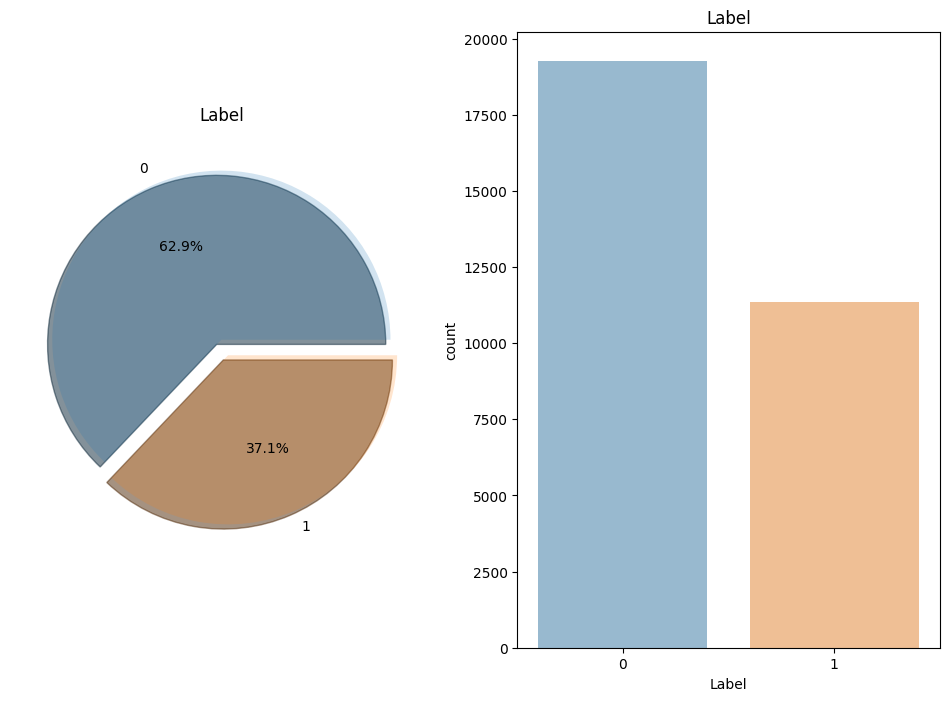

In [89]:
f,ax=plt.subplots(1,2,figsize=(12,8))
df['Label'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=ax[0],shadow=True, wedgeprops={'alpha':0.2})


ax[0].set_title('Label')
ax[0].set_ylabel('')

sns.countplot(df,x='Label',ax=ax[1], alpha=0.5)
ax[1].set_title('Label')
plt.show()

In [90]:
tfidf_transformer = TfidfVectorizer(
    ngram_range=(1, 3),
    analyzer='word',
    lowercase=True,
    max_features=50000,
    stop_words=None
)

logreg = LogisticRegression(
    C=100,
    solver='liblinear',
    max_iter=500
)

model = Pipeline([
 #   ('smote', smote),
    ('tfidf', tfidf_transformer), 
    ('logit', logreg)
])

In [91]:
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=11)
X = df['Sentence'].copy()
y = df['Label'].copy()

In [92]:
i=1
cv_score=[]
for train_index, test_index in skf.split(X, y):
    print(f'{i} of KFold {skf.n_splits}')
    xtr,xvl = X.loc[train_index],X.loc[test_index]
    ytr,yvl = y.loc[train_index],y.loc[test_index]
    model = Pipeline([
 #   ('smote', smote),
    ('tfidf', tfidf_transformer), 
    ('logit', logreg)
    ])
    model.fit(xtr,ytr)
    score = recall_score(yvl,model.predict(xvl))
    print('Confusion matrix\n',confusion_matrix(yvl,model.predict(xvl)))
    print(f'recall score: {score}')
    cv_score.append(score)    
    i+=1

1 of KFold 10
Confusion matrix
 [[1913   14]
 [  17 1120]]
recall score: 0.9850483729111698
2 of KFold 10
Confusion matrix
 [[1914   12]
 [  20 1117]]
recall score: 0.9824098504837291
3 of KFold 10
Confusion matrix
 [[1912   14]
 [  13 1124]]
recall score: 0.9885664028144239
4 of KFold 10
Confusion matrix
 [[1917   10]
 [  19 1117]]
recall score: 0.983274647887324
5 of KFold 10
Confusion matrix
 [[1909   18]
 [  20 1116]]
recall score: 0.9823943661971831
6 of KFold 10
Confusion matrix
 [[1914   13]
 [  26 1110]]
recall score: 0.977112676056338
7 of KFold 10
Confusion matrix
 [[1916   11]
 [  12 1124]]
recall score: 0.9894366197183099
8 of KFold 10
Confusion matrix
 [[1914   13]
 [  24 1112]]
recall score: 0.9788732394366197
9 of KFold 10
Confusion matrix
 [[1913   14]
 [  14 1122]]
recall score: 0.9876760563380281
10 of KFold 10
Confusion matrix
 [[1917   10]
 [  12 1124]]
recall score: 0.9894366197183099


In [93]:
np.mean(cv_score)

0.9844228851561436

In [94]:
model.predict(['{ $ne : -1 }'])

array([1])

In [98]:
joblib.dump(model, 'LRModel.pkl')

['LRModel.pkl']